In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 
pd.options.display.max_columns = None

X_train = pd.read_csv("train_values.csv")
y_train = pd.read_csv("train_labels.csv")
train = pd.concat([X_train, y_train], axis=1)

In [2]:
train.drop("row_id", axis=1, inplace=True)

replace_dict = {
    'msa_md': -1,
    'state_code': -1,
    'county_code': -1,
    'occupancy': 3,
    'preapproval': 3,
    'applicant_ethnicity': [3, 4, 5],
    "applicant_race": [6, 7, 8],
    "applicant_sex": [3, 4, 5]
}

cat_cols_few = ["loan_type", "property_type", "loan_purpose", "occupancy", "preapproval",
                "applicant_ethnicity", "applicant_race", "applicant_sex", "co_applicant"] 

cat_cols_many = ["msa_md", "state_code", "county_code", "lender"]

numerical_cols = ["loan_amount", "applicant_income", "population", "minority_population_pct",
                 "ffiecmedian_family_income", "tract_to_msa_md_income_pct",
                 "number_of_owner-occupied_units", "number_of_1_to_4_family_units"]

train.replace(replace_dict, np.nan, inplace = True)
train.count()

loan_type                         500000
property_type                     500000
loan_purpose                      500000
occupancy                         497811
loan_amount                       500000
preapproval                        88891
msa_md                            423018
state_code                        480868
county_code                       479534
applicant_ethnicity               436883
applicant_race                    434460
applicant_sex                     458682
applicant_income                  460052
population                        477535
minority_population_pct           477534
ffiecmedian_family_income         477560
tract_to_msa_md_income_pct        477486
number_of_owner-occupied_units    477435
number_of_1_to_4_family_units     477470
lender                            500000
co_applicant                      500000
accepted                          500000
dtype: int64

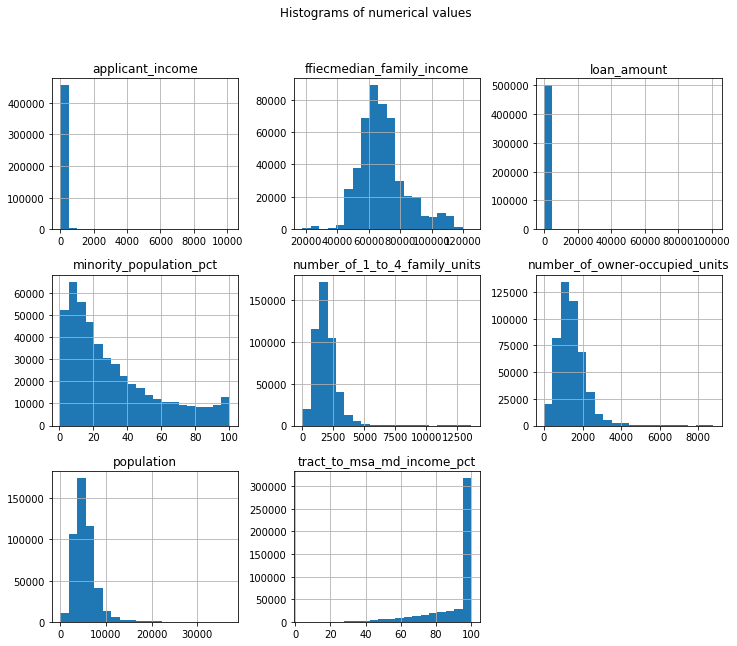

Skewness of numerical columns:


loan_amount                       76.552786
applicant_income                  22.277181
population                         2.864237
minority_population_pct            1.009139
ffiecmedian_family_income          0.773280
tract_to_msa_md_income_pct        -1.963872
number_of_owner-occupied_units     1.881743
number_of_1_to_4_family_units      2.016264
dtype: float64

In [3]:
train[numerical_cols].hist(figsize=(12,10), bins=20)
plt.suptitle("Histograms of numerical values")
plt.show()

print("Skewness of numerical columns:")
train[numerical_cols].skew()

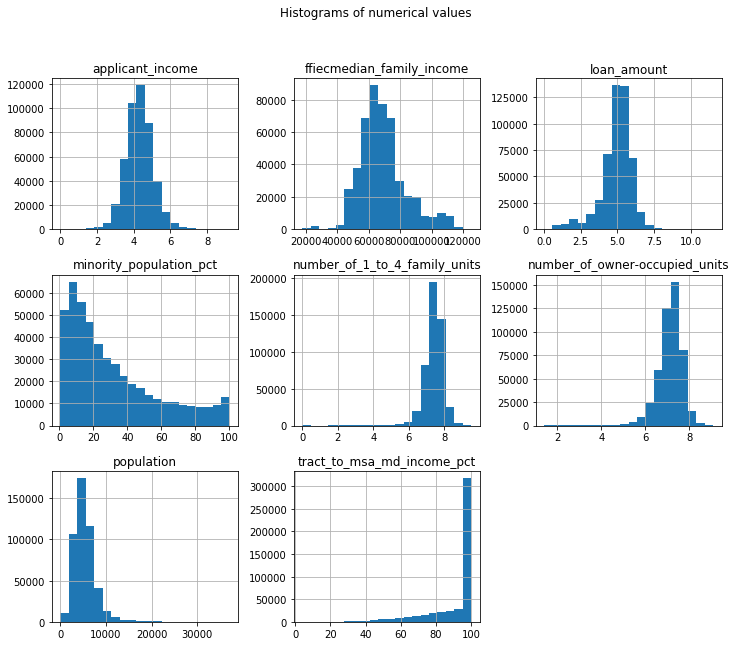

Skewness of numerical columns after applying log function:


loan_amount                      -1.190548
applicant_income                  0.026275
population                        2.864237
minority_population_pct           1.009139
ffiecmedian_family_income         0.773280
tract_to_msa_md_income_pct       -1.963872
number_of_owner-occupied_units   -1.076900
number_of_1_to_4_family_units    -1.568488
dtype: float64

In [4]:
import math
to_log = ["loan_amount", "applicant_income", "number_of_owner-occupied_units", "number_of_1_to_4_family_units"]
train[to_log] = train[to_log].applymap(math.log)

train[numerical_cols].hist(figsize=(12,10), bins=20)
plt.suptitle("Histograms of numerical values")
plt.show()

print("Skewness of numerical columns after applying log function:")
train[numerical_cols].skew()

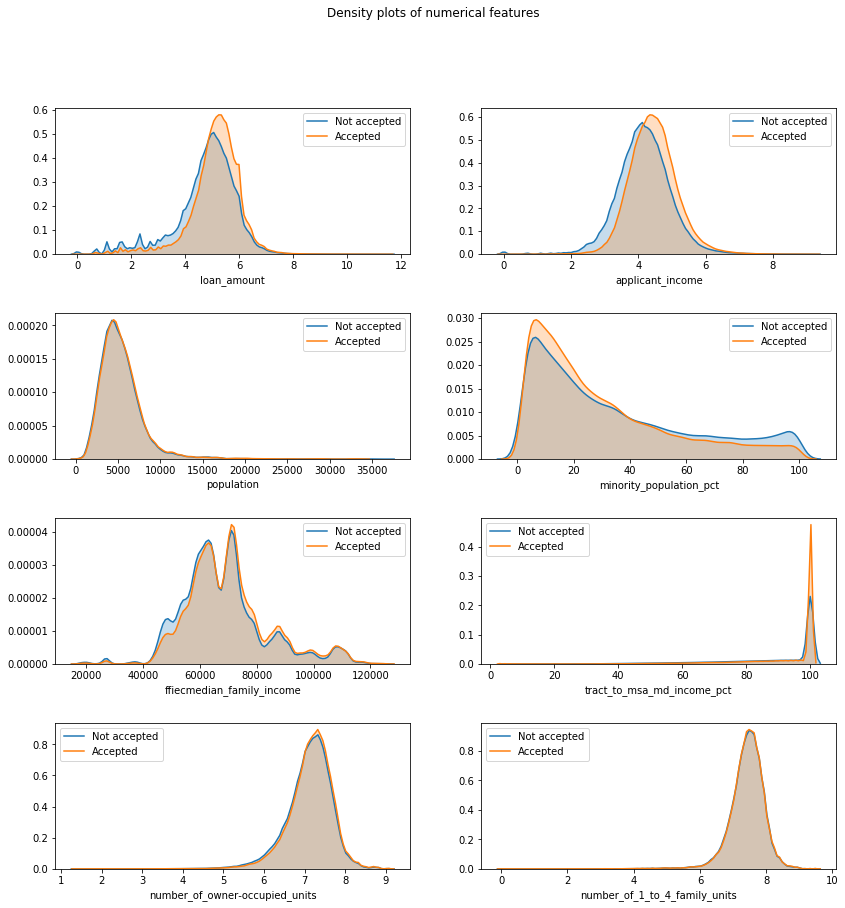

In [5]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (14,14))
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)
fig.suptitle("Density plots of numerical features")

for ax, col in zip(axes.flatten(), numerical_cols) :
    sns.kdeplot(train[train["accepted"] == 0][col], shade="True", label="Not accepted", ax = ax)
    sns.kdeplot(train[train["accepted"] == 1][col], shade="True", label="Accepted", ax = ax)
    ax.set_xlabel(col)


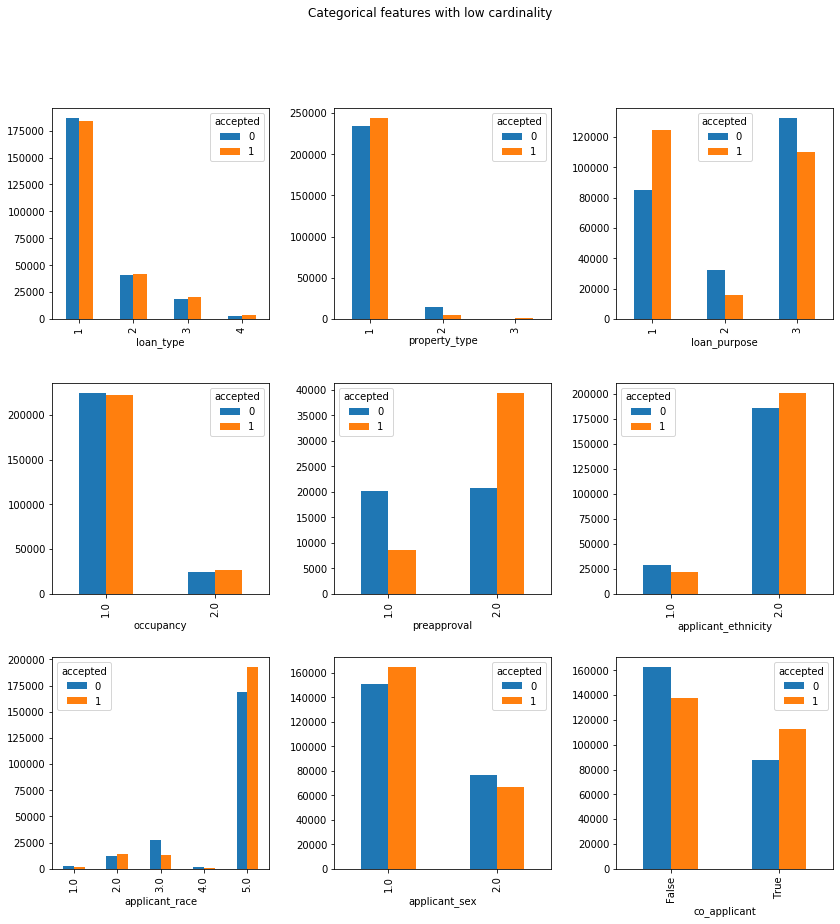

In [6]:
fig, axes = plt.subplots(ncols = 3, nrows = 3, figsize = (14,14))
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
fig.suptitle("Categorical features with low cardinality")

for ax, col in zip(axes.flatten(), cat_cols_few) :
    pd.crosstab(train[col], train["accepted"]).plot(kind="bar", ax = ax)
    ax.set_xlabel(col)

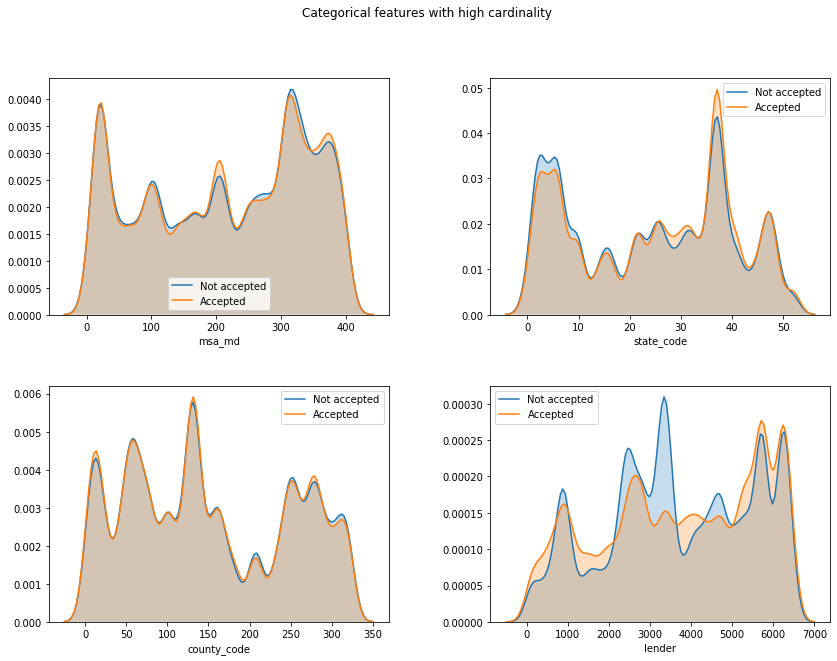

In [7]:
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (14,10))
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
fig.suptitle("Categorical features with high cardinality")

for ax, col in zip(axes.flatten(), cat_cols_many) :
    sns.kdeplot(train[train["accepted"] == 0][col], shade="True", label="Not accepted", ax = ax)
    sns.kdeplot(train[train["accepted"] == 1][col], shade="True", label="Accepted", ax = ax)
    ax.set_xlabel(col)


In [8]:
train["minority_population"] = (train["minority_population_pct"] / 100) * (train["population"])
train["tract_family_income"] = (train["tract_to_msa_md_income_pct"] /100) * (train["ffiecmedian_family_income"])

train["minority_population"] = train["minority_population"].apply(math.log)

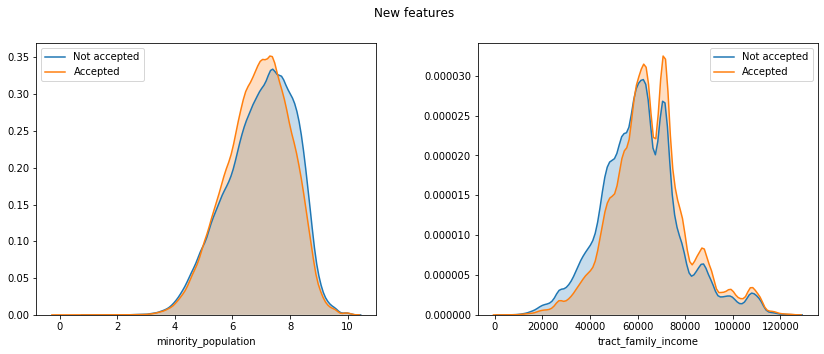

In [9]:
new_cols = ["minority_population", "tract_family_income"]

fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (14,5))
fig.subplots_adjust(hspace = 0.5, wspace = 0.3)
fig.suptitle("New features")

for ax, col in zip(axes.flatten(), new_cols) :
    sns.kdeplot(train[train["accepted"] == 0][col], shade="True", label="Not accepted", ax = ax)
    sns.kdeplot(train[train["accepted"] == 1][col], shade="True", label="Accepted", ax = ax)
    ax.set_xlabel(col)

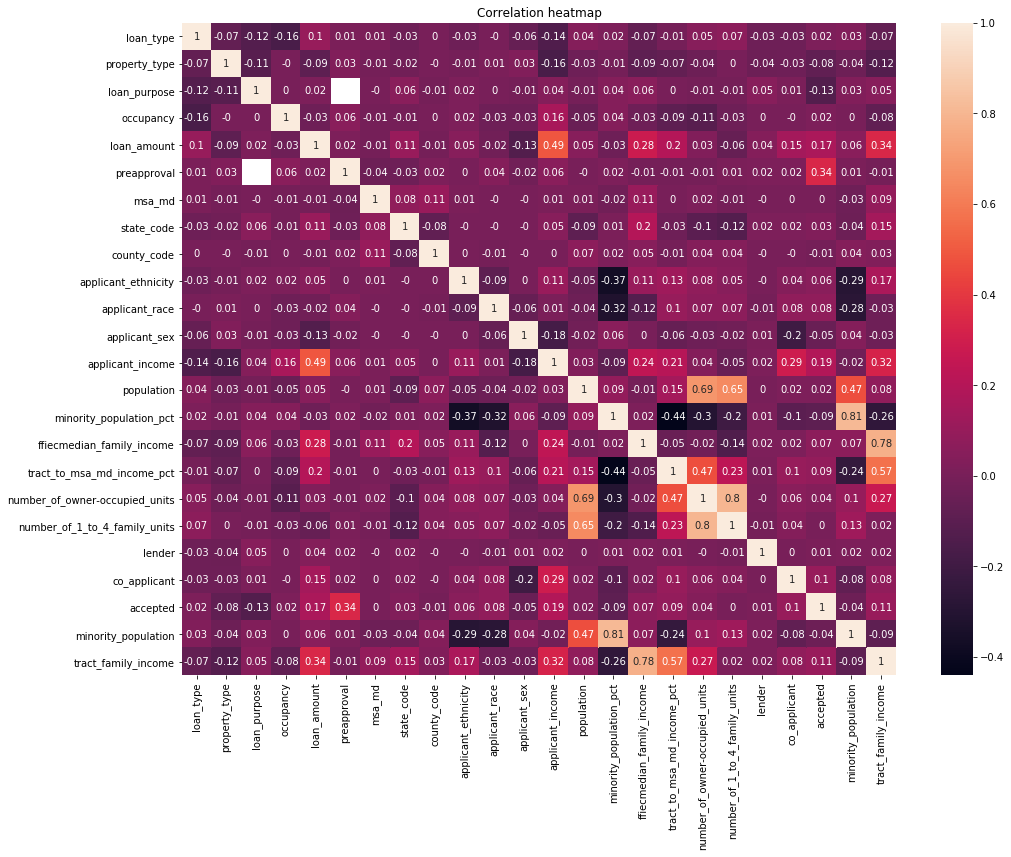

In [10]:
plt.figure(figsize=(16,12))
sns.heatmap(train.corr().round(decimals=2), annot=True)
plt.title("Correlation heatmap")
plt.show()